**José Enrique Zafra Mena**


# Difracción de Franhofer:


Tomemos una abertura situada en el origen de coordenadas O, una funte puntual $S$ de coordenadas $(x,y,z)$ y un punto $P$ de coordenadas $(x',y',z')$ sobre una pantalla como se muestra en el siguiente esquema:

<img height="500" src="esquema_difraccion.png" width="1250"/>

El campo eléctrico producido por la fuente $S$ en $P$, considerando la aproximación de Fraunhofer viene dada por:

$$E(P)=cte.\int_\Sigma A(\xi,\eta)\exp[-ik((\alpha-\alpha')\xi+(\beta-\beta')\eta)]d\xi d\eta\, ,$$

donde $A(\xi,\eta)$ es la función que define la abertura, $\alpha=x/l$, $\beta=y/l$, $\alpha'=x'/l'$, y $\beta'=y'/l'$; siendo $l$ y $l'$ la distancia de $S$ y $P$ al origen de coordenadas.

La intensidad en el punto $P$ es proporcional a

$$I(P)\propto \|E(P)\|^2$$

\[1\] Casas, J. Difracción. En *Optica* (pp. 277-316).

\[2\] [Fraunhofer](https://en.wikipedia.org/wiki/Fraunhofer_diffraction_equation)




## Apertura rectangular:

- Considerar una abertura rectangular de tamaño $2a\times 2b$. Crear una matriz que represente dicha abertura y representarla con imshow. 

**AYUDA**: se recomienda usar la función meshgrid de numpy, pero no es la única manera.

In [251]:
#Librerias
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.constants import c, pi
from gaussxw import *

#Variables globales que no cambian en el documento
x_pantalla=np.linspace(-0.0002,0.0002,200)
y_pantalla=np.linspace(-0.0005,0.0005,100)

x_doble=np.linspace(-0.00002, 0.00002, 200)
y_doble=np.linspace(-0.00005, 0.00005, 100)


#Definir funciones

def abertura(a,b):
    x=np.linspace(-a,a,200)
    y=np.linspace(-b,b,100)
    X,Y=np.meshgrid(x,y)
    Z=X*0
    lim_xi, lim_xf = (int(len(x)/4),int(3*len(x)/4))
    lim_yi, lim_yf = (int(len(y)/4),int(3*len(y)/4))
    print("A.shape =",Z.shape )
    for i in range(lim_yi,lim_yf):
        for j in range(lim_xi,lim_xf):
            Z[i,j]=1
    return(Z)

def abertura_doble(a,b):
    x=np.linspace(-3.5*a,3.5*a,200)
    y=np.linspace(-b,b,100)
    X,Y=np.meshgrid(x,y)
    Z=Y*0
    lim_xi1, lim_xf1 = (int(2*len(x)/7),int(3*len(x)/7))
    lim_yi1, lim_yf1 = (int(len(y)/4),int(3*len(y)/4))
    lim_xi2, lim_xf2 = (int(4*len(x)/7),int(5*len(x)/7))
    lim_yi2, lim_yf2 = (int(len(y)/4),int(3*len(y)/4))
    for i in range(lim_yi1,lim_yf1):
        for j in range(lim_xi1,lim_xf1):
            Z[i,j]=1
    for k in range(lim_yi2,lim_yf2):
        for l in range(lim_xi2,lim_xf2):
            Z[k,l]=1
    return Z

def abertura_doble_perpen(a,b):
    # tiene que cumplirse que b >= 2a ?
    x=np.linspace(-3.5*a-b/2,3.5*a+b/2,200)
    y=np.linspace(-b,b,100)
    X,Y=np.meshgrid(x,y)
    Z=Y*0
    coef=5*a+b
    lim_xi1, lim_xf1 = (int(2*a*len(x)/coef),int(3*a*len(x)/coef))
    lim_yi1, lim_yf1 = (int(len(y)/4),int(3*len(y)/4))
    lim_xi2, lim_xf2 = (int(4*a*len(x)/coef),int((4*a+b)*len(x)/coef))
    lim_yi2, lim_yf2 = (int((b-a/2)*len(y)/(2*b)),int((b+a/2)*len(y)/(2*b)))
    for i in range(lim_yi1,lim_yf1):
        for j in range(lim_xi1,lim_xf1):
            Z[i,j]=1
    for k in range(lim_yi2,lim_yf2):
        for l in range(lim_xi2,lim_xf2):
            Z[k,l]=1
    return Z


def I(xp,yp):       # (xp, yp) son vectores
    lp=1            # en metros
    N=100
    a=0.018
    b=0.010
    X,wx=gaussxwab(N, -a/2, a/2)                    # definimos eje x abertura y pesos
    Y,wy=gaussxwab(N, -b/2, b/2)                    # definimos eje y abertura y pesos
    A=abertura(b,a)                              # función abertura
    print(A.shape)
    S=np.zeros([len(yp),len(xp)])
    for m in tqdm(range(len(yp))):
        for n in range(len(xp)):
                for i in range(N):
                    for j in range(N):
                            if A[i,j]==1:
                                S[m,n]+=wx[i]*wy[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y[j]+(yp[m])*X[i]))
                            else:
                                continue
    return np.real(S*np.conjugate(S))




def I_doble(xp,yp):       # (xp, yp) son vectores
    lp=1    # en metros
    N=100
    # parámetros de las rendijas:
    a=0.018
    b=0.010
    X1, wx1 = gaussxwab(N, -a/2, a/2)                    # definimos eje x abertura y pesos
    Y1, wy1 = gaussxwab(N, -b/2, b/2)                    # definimos eje y abertura y pesos
    X2, wx2 = gaussxwab(N, 3*a/2, 7*a/2)
    Y2, wy2 = Y1, wy1
    A=abertura_doble(b,a)                              # función abertura

    S1=np.zeros([len(yp),len(xp)])
    S2=np.zeros([len(yp),len(xp)])

    for m in tqdm(range(len(yp))):
        for n in range(len(xp)):
            for i in range(N):
                for j in range(N):
                    if A[i,j]==1:
                        S1[m,n]+=wx1[i]*wy1[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y1[j]+yp[m]*X1[i]))
                        S2[m,n]+=wx1[i]*wy2[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y2[j]+(yp[m]/(np.sqrt(1+(2*a)**2)))*X1[i]))
                    else:
                        continue
    S=S1+S2
    return np.real(S*np.conjugate(S))

def I_doble_perpen(xp,yp):       # (xp, yp) son vectores
    lp=1    # en metros
    N=100
    # parámetros de las rendijas:
    a=0.018
    b=0.010
    X1, wx1 = gaussxwab(N, -a/2, a/2)                    # definimos eje x abertura y pesos
    Y1, wy1 = gaussxwab(N, -b/2, b/2)                    # definimos eje y abertura y pesos
    X2, wx2 = gaussxwab(N, -b/a, b/2)
    Y2, wy2 = gaussxwab(N, -a/2, a/2)
    A=abertura_doble_perpen(b,a)                              # función abertura

    S1=np.zeros([len(yp),len(xp)])
    S2=np.zeros([len(yp),len(xp)])

    for m in tqdm(range(len(yp))):
        for n in range(len(xp)):
            for i in range(N):
                for j in range(N):
                    if A[i,j]==1:
                        S1[m,n]+=wx1[i]*wy1[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y1[j]+yp[m]*X1[i]))
                        S2[m,n]+=wx2[i]*wy2[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y2[j]+yp[m]*X2[i]))
                    else:
                        continue
    S=S1+S2
    return np.real(S*np.conjugate(S))



- Considere una longitud de onda $\lambda=650nm$ y calcule el patrón de difracción (intensidad) producido por una fuente puntual $S$ situada sobre el eje Z al difractar en una abertura rectangular de dimensiones $10\times18mm$, sobre una pantalla situada a un metro de distancia de la rendija (considerar una pantalla cuadrada pequeña, del orden de milímetros).

**AYUDA**: Al definir la abertura y la pantalla tomar una cantidad de puntos para definir la matriz del orden de $N=100$ para que el cálculo sea rápido. 

A.shape = (100, 200)
(100, 200)


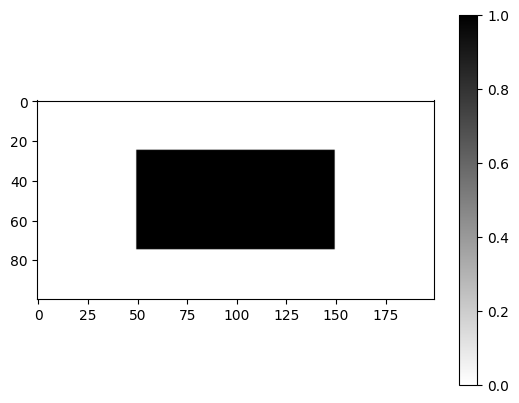

In [232]:
A_1=abertura(0.010,0.018)
print(A_1.shape)

plt.imshow(A_1,cmap='binary',vmax=1,vmin=0)
plt.colorbar()
plt.show()

- Representar el patrón de difracción calculado. **AYUDA**: además de dividir la intensidad por su valor máximo para que tome valores entre 0 y 1, se recomienda usar la opción `vmax` de imshow, ya que los segundos picos tienen tienen poca intensidad.

In [233]:
Z_1=I(x_pantalla,y_pantalla)
Z_norm_1=Z_1/np.max(Z_1)

A.shape = (100, 200)
(100, 200)


  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\kikek\AppData\Local\Temp\ipykernel_15252\403194520.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  S[m,n]+=wx[i]*wy[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y[j]+(yp[m])*X[i]))
100%|██████████| 100/100 [03:17<00:00,  1.98s/it]


[]

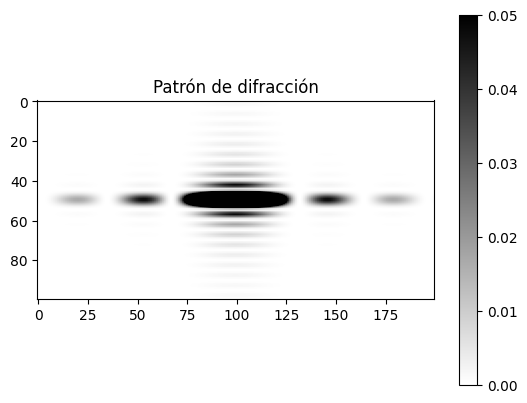

In [234]:
plt.imshow(Z_norm_1,cmap="binary",vmax=0.05,vmin=0)
plt.colorbar()
plt.title("Patrón de difracción")
plt.plot()

## Apertura de dos rendijas:

- Definir una función abertura con dos rendijas paralelas

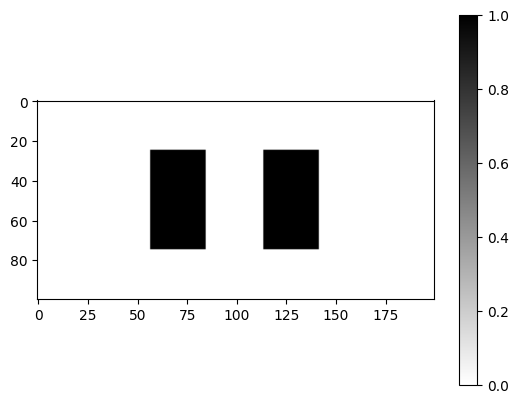

In [80]:
a2=0.018
b2=0.010
A2=abertura_doble(b2,a2)

plt.imshow(A2,cmap='binary',vmax=1,vmin=0)
plt.colorbar()
plt.show()

- Calculad el patron de difracción producido por la rendija anterior sobre el eje horizontal de la pantalla ($y'=0$).

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\kikek\AppData\Local\Temp\ipykernel_15252\141167451.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  S1[m,n]+=wx1[i]*wy1[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y1[j]+yp[m]*X1[i]))
C:\Users\kikek\AppData\Local\Temp\ipykernel_15252\141167451.py:112: ComplexWarning: Casting complex values to real discards the imaginary part
  S2[m,n]+=wx1[i]*wy2[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y2[j]+(yp[m]/(np.sqrt(1+(2*a)**2)))*X1[i]))
100%|██████████| 100/100 [04:19<00:00,  2.59s/it]


[]

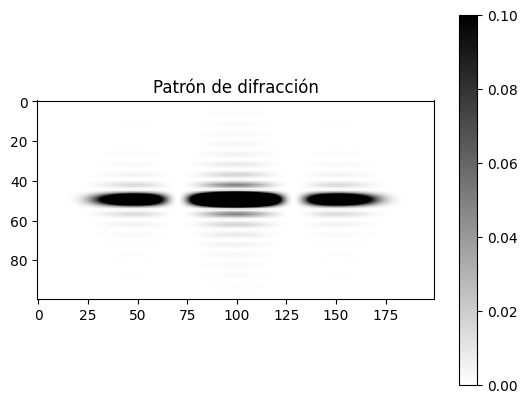

In [265]:
Z_doble=I_doble(x_pantalla,y_pantalla)
Z_norm_doble=Z_doble/np.max(Z_doble)

plt.imshow(Z_norm_doble,cmap="binary",vmax=0.1,vmin=0)
plt.colorbar()
plt.title("Patrón de difracción")
plt.plot()

[]

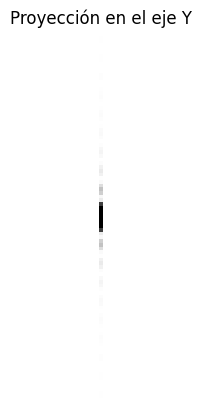

In [243]:
proj_y=Z_doble[:,100:101]
proj_y=proj_y/np.max(proj_y)
plt.imshow(proj_y,cmap="binary",vmax=0.2,vmin=0,extent=[100,101,0,100])
plt.axis("off")
plt.title("Proyección en el eje Y")
plt.plot()

- Representar el patrón de difracción que se produce sobre el eje X

[]

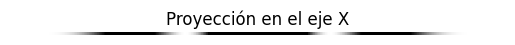

In [250]:
proj_x=Z_doble[50:51,:]
proj_x=proj_x/np.max(proj_x)
plt.imshow(proj_x,cmap="binary",vmax=0.2,vmin=0, extent=[0,175,50,51])
plt.title("Proyección en el eje X")
plt.axis("off")
plt.plot()

## Aperturas no paralelas:

- Definid una nueva abertura con dos perforaciones no paralelas

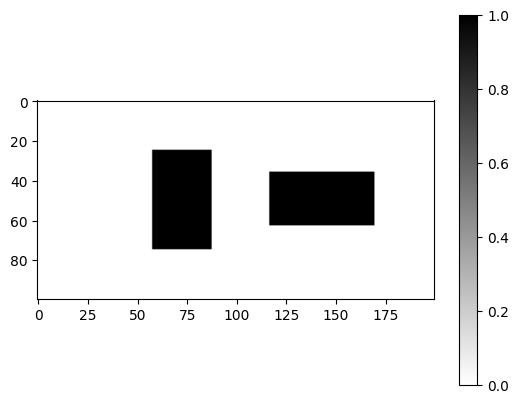

In [236]:
a2=0.018
b2=0.010
A2=abertura_doble_perpen(b2,a2)

plt.imshow(A2,cmap='binary',vmax=1,vmin=0)
plt.colorbar()
plt.show()

- Calculad el patrón de difracción producido y representarlo

In [261]:
Z_4=I_doble_perpen(x_pantalla,y_pantalla)
Z_norm_4=Z_4/np.max(Z_4)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\kikek\AppData\Local\Temp\ipykernel_15252\141167451.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  S1[m,n]+=wx1[i]*wy1[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y1[j]+yp[m]*X1[i]))
C:\Users\kikek\AppData\Local\Temp\ipykernel_15252\141167451.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
  S2[m,n]+=wx2[i]*wy2[j]*np.exp(2j*pi/(650e-9)*(xp[n]/lp *Y2[j]+yp[m]*X2[i]))
100%|██████████| 100/100 [03:57<00:00,  2.37s/it]


[]

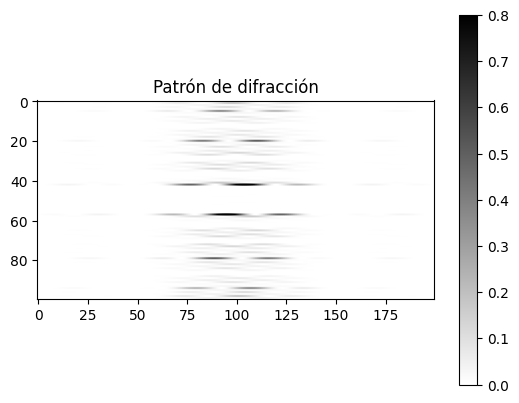

In [264]:
plt.imshow(Z_norm_4,cmap="binary",vmax=0.8,vmin=0)
plt.colorbar()
plt.title("Patrón de difracción")
plt.plot()